In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

In [2]:
class SudokuGenerator():
    def __init__(self, font, border=0.05):
        self.font = font
        self.border = border

    def generate(self, dim, number_density):
        img = np.array(np.ones((dim[0], dim[1], 3))*255).astype(int)
        img = Image.fromarray(np.uint8(img))

        self.outline, self.corners = self._get_outline(dim)
        self.squares = self._get_square_coordinates(
            self.corners['t'], self.corners['l'], self.corners['r'], self.corners['b'])

        img = self._draw_outline(img, self.outline)
        img = self._draw_squares(img, self.squares, number_density)

        return img

    def _get_outline(self, dim):
        top = int(self.border*dim[1])
        left = int(self.border*dim[0])
        right = dim[0] - left
        bottom = dim[1] - top

        corners = {'t': top, 'l': left, 'r': right, 'b': bottom}

        outline = ((left, top), (left, bottom),
                   (right, bottom), (right, top))

        return outline, corners

    def _get_square_coordinates(self, t, l, r, b):
        self.total_width = r - l
        self.total_height = b - t

        self.sq_width = self.total_width / 9
        self.sq_height = self.total_height / 9

        squares = []

        for i, j in itertools.product(range(9), range(9)):
            sq_left = int(l + i*self.sq_width)
            sq_top = int(t + j*self.sq_height)
            sq_right = int(l + (i+1)*self.sq_width)
            sq_bottom = int(t + (j+1)*self.sq_height)

            sq = ((sq_left, sq_top), (sq_left, sq_bottom),
                  (sq_right, sq_bottom), (sq_right, sq_top))
            squares.append(sq)

        return squares

    def _draw_outline(self, img, outline):
        draw = ImageDraw.Draw(img)
        draw.polygon(outline, outline='black')
        return img

    def _draw_squares(self, img, squares, number_density):   
        draw = ImageDraw.Draw(img)
        
        for sq in squares:
            draw.polygon(sq, outline='black')

            if np.random.uniform() < number_density:
                number = np.random.randint(1, 10)
                sq_left = sq[0][0]
                sq_top = sq[0][1]

                draw.text((sq_left + 15, sq_top + 5),
                          str(number), fill='black', font=self.font)

        return img

In [3]:
font_finder = FontManager()
font_path = font_finder.findfont('arial')
font = ImageFont.truetype(font_path, 35)

In [4]:
gen = SudokuGenerator(font=font, border=0.05)

for img_num in range(100):
    img = gen.generate((500, 500), np.random.uniform(0.05, 0.20))
    img.save(f'generated_sudokus/{img_num}.jpg')

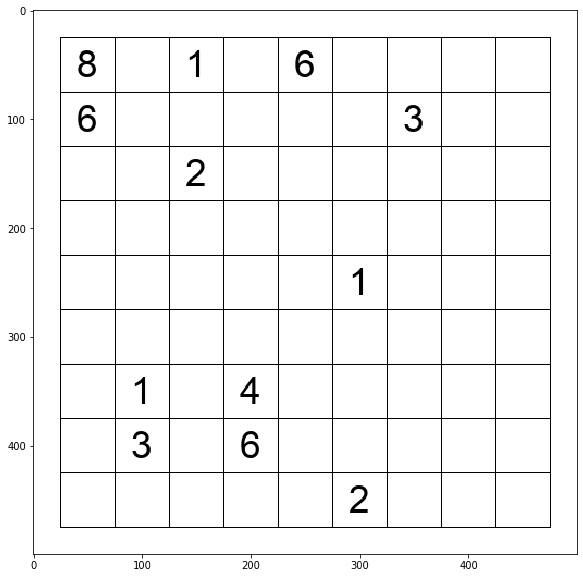

In [5]:
plt.figure(figsize=(10,10))
imshow(np.asarray(img))
plt.show()